# Analysing Used iPhone Market

- The main aim of this project is to analyse the used iPhone market in Lithuania.

- The dataset used was scraped from a Lithuanian advertisement platform for primarily used items (Skelbiu) in December, 2025. The dataset describes used iPhone listings (views, likes, description) and phone attributes (model, condition, price, etc).

### Libraries

In [164]:
import regex as re

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Dataset

In [78]:
iphones = pd.read_csv('./iphones20251227.csv')

## Dataset overview

In [79]:
iphones

,id,name,maker,model,condition,price,city,views,likes,description,url,stars,sold,sale_time,last_update,registration_date,n_listings,seller_verified
0,82852315.0,iPhone 15 pro max 256gb,Apple,iPhone 15 Pro Max,Naudota,650.0,Vilnius,0.0,0.0,"iPhone 15 Pro Max 256GB, 89% baterija, puikios...",https://www.skelbiu.lt/skelbimai/iphone-15-pro...,1.0,False,NaN,Atnaujintas prieš 2 min.,2018-09-01 00:00:00,58.0,True
1,82852217.0,iPhone 14 pro max,Apple,iPhone 14 Pro Max,Naudota,515.0,Šiauliai,2.0,0.0,"Parduodamas „iPhone 14 Pro Max“. 256 GB, 84 % ...",https://www.skelbiu.lt/skelbimai/iphone-14-pro...,NaN,False,NaN,Atnaujintas prieš 19 min.,2021-11-01 00:00:00,31.0,False
2,82852209.0,iPhone 14,Apple,iPhone 14,Naudota,300.0,Vilnius,11.0,1.0,Iphone 14 128GB Blue. Baterija 90%. Pilnos kom...,https://www.skelbiu.lt/skelbimai/iphone-14-828...,1.0,False,NaN,Atnaujintas prieš 20 min.,2015-04-01 00:00:00,4.0,True
3,82852065.0,iPhone 14 pro 128gb,Apple,iPhone 14 Pro,Naudota,470.0,Klaipėda,3.0,0.0,"Parduodu iPhone 14 Pro 128 GB, telefonas tvark...",https://www.skelbiu.lt/skelbimai/iphone-14-pro...,NaN,False,NaN,Atnaujintas prieš 21 min.,2014-11-01 00:00:00,203.0,True
4,82852055.0,iPhone 16 128gb,Apple,iPhone 16,Naudota,540.0,Šiauliai,15.0,3.0,Idealaus stovio. 128GB\nViskas originalu nieka...,https://www.skelbiu.lt/skelbimai/iphone-16-128...,NaN,False,NaN,Atnaujintas prieš 28 min.,2021-03-01 00:00:00,66.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3377,82507175.0,"Parduodu, labai geros būklės",Apple,iPhone 12,Naudota,200.0,Marijampolė,227.0,2.0,"Zalias, 128gb",https://www.skelbiu.lt/skelbimai/parduodu-laba...,NaN,False,NaN,Atnaujintas prieš 1 d.,2025-10-01 00:00:00,5.0,True
3378,82845939.0,Iphonas 11pro max,Apple,iPhone 11 Pro Max,Naudota,140.0,Vilnius,27.0,3.0,Iphonas pro max 11 baterija 79,https://www.skelbiu.lt/skelbimai/iphonas-11pro...,NaN,False,NaN,Atnaujintas prieš 1 d.,2021-11-01 00:00:00,16.0,True
3379,82616093.0,Geros bukles,Apple,iPhone 13,Naudota,200.0,Vilnius,123.0,5.0,jokiu ibrezimu veikia puikiai.,https://www.skelbiu.lt/skelbimai/geros-bukles-...,NaN,False,NaN,Atnaujintas prieš 1 d.,2016-07-01 00:00:00,16.0,True
3380,82822955.0,Bukle 10/10,Apple,iPhone 13 Pro Max,Naudota,330.0,Kaunas,75.0,0.0,Baterija 86 128 gb,https://www.skelbiu.lt/skelbimai/bukle-10-10-8...,NaN,False,NaN,Atnaujintas prieš 10 val.,2021-02-01 00:00:00,8.0,True


There are no mistakes caused by reading the dataset. Everything looks normal.

In [80]:
iphones[iphones.duplicated()].head()

,id,name,maker,model,condition,price,city,views,likes,description,url,stars,sold,sale_time,last_update,registration_date,n_listings,seller_verified
24,82850887.0,"iPhone 13 Pro ,Idealios Būklės",Apple,iPhone 13 Pro,Naudota,350.0,Klaipėda,31.0,3.0,Labai tvarkingas be ibrezimu.\nDežute.,https://www.skelbiu.lt/skelbimai/iphone-13-pro...,1.0,False,NaN,Atnaujintas prieš 2 val.,2023-12-01 00:00:00,1.0,True
60,82851417.0,iPhone 14 Pro Max. Battery Health 94%,Apple,iPhone 14 Pro Max,Naudota,450.0,Vilnius,29.0,0.0,Parduodu puikiai išlaikytą iPhone 14 Pro Max 1...,https://www.skelbiu.lt/skelbimai/iphone-14-pro...,1.0,False,NaN,Atnaujintas prieš 2 val.,2025-04-01 00:00:00,68.0,False
288,82822199.0,iPhone 16pro 128gb,Apple,iPhone 16 Pro,Naudota,480.0,Vilnius,267.0,10.0,"Parduodamas iphone 16pro 128gb , skilęs ekrana...",https://www.skelbiu.lt/skelbimai/iphone-16pro-...,NaN,False,NaN,Atnaujintas prieš 11 val.,2023-09-01 00:00:00,124.0,True
312,82202426.0,iPhone 14,Apple,iPhone 14,Naudota,400.0,Klaipėda,136.0,2.0,Labai geros būklės Iphone 14 128GB\nBaterija 8...,https://www.skelbiu.lt/skelbimai/iphone-14-822...,NaN,False,NaN,Atnaujintas prieš 6 val.,2010-02-01 00:00:00,3328.0,True
386,76432825.0,iPhone 16 Pro 256gb open box garantija,Apple,iPhone 16 Pro,Nauja,900.0,Vilnius,3000.0,38.0,"naujas, su garantija:\niPhone 16 Pro 256GB des...",https://www.skelbiu.lt/skelbimai/iphone-16-pro...,NaN,False,NaN,Atnaujintas prieš 7 val.,2014-10-01 00:00:00,10750.0,True


There are quite a few rows that are duplicated. The website that was scraped sometimes shows ads that appeared is the last page. We will remove them.

In [81]:
iphones = iphones.drop_duplicates()

In [82]:
iphones.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3342 entries, 0 to 3381
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 3342 non-null   float64
 1   name               3342 non-null   object 
 2   maker              3342 non-null   object 
 3   model              3342 non-null   object 
 4   condition          3340 non-null   object 
 5   price              3280 non-null   float64
 6   city               3225 non-null   object 
 7   views              3342 non-null   float64
 8   likes              3342 non-null   float64
 9   description        3162 non-null   object 
 10  url                3342 non-null   object 
 11  stars              94 non-null     float64
 12  sold               3342 non-null   bool   
 13  sale_time          117 non-null    object 
 14  last_update        3342 non-null   object 
 15  registration_date  3225 non-null   object 
 16  n_listings         3223 non-n

We are left with 3342 ads. Some columns have missings values: there are listings that did not provide a price, the vast majority of listings did not have any 'starts' (were not promoted by the seller) and so on.

### ID

In [83]:
iphones['id']

0       82852315.0
1       82852217.0
2       82852209.0
3       82852065.0
4       82852055.0
           ...    
3377    82507175.0
3378    82845939.0
3379    82616093.0
3380    82822955.0
3381    82836327.0
Name: id, Length: 3342, dtype: float64

Each listing is assigned a unique ID and it is visible on the website.

In [84]:
iphones[iphones['id'].duplicated()].shape[0]

20

Checking for futher duplicates based on ID, 20 rows come up. These also have to be removed.

In [85]:
iphones = iphones.drop_duplicates(subset='id', keep='last')

### Name

In [86]:
iphones['name']

0                                 iPhone 15 pro max 256gb
16                           iPhone 13 128gb 86%baterijos
17      Idelaus stovio iPhone 14 Pro Max Space Black 1...
18                  iPhone 14 Pro Max. Battery Health 94%
21                         iPhone 13 Pro ,Idealios Būklės
                              ...                        
3377                         Parduodu, labai geros būklės
3378                                    Iphonas 11pro max
3379                                         Geros bukles
3380                                          Bukle 10/10
3381                                   Stovis labai geras
Name: name, Length: 3322, dtype: object

Names do not necessarily describe what is being advertised. Some names are set as 'Conditions wery good' ('Stovis labai geras'), but others do have useful additional information that could be extracted such as storage capacity, color, battery health, etc.

### Model

In [87]:
iphones['model'].value_counts()

model
iPhone 13            276
iPhone 14 Pro        199
iPhone 11            194
iPhone 14 Pro Max    194
iPhone 13 Pro        181
iPhone 15 Pro Max    176
iPhone 12            153
iPhone 14            149
iPhone 13 Pro Max    142
iPhone 12 Pro        134
iPhone 15 Pro        130
iPhone 16 Pro Max    108
iPhone 12 Pro Max    105
iPhone 15            105
iPhone XR             73
iPhone 11 Pro         64
iPhone 11 Pro Max     61
iPhone 16 Pro         56
iPhone X              55
iPhone 12 mini        54
iPhone 8              50
iPhone 17 Pro Max     48
iPhone 7              45
iPhone 13 mini        45
iPhone SE (2020)      45
iPhone 16             44
iPhone 14 Plus        43
iPhone 17 Pro         39
iPhone 6S             37
iPhone XS             35
iPhone 8 Plus         32
iPhone XS Max         31
iPhone 15 Plus        29
iPhone 7 Plus         26
iPhone SE             20
iPhone 16e            19
iPhone 5S             17
iPhone 17             17
iPhone 6              16
iPhone 16 Plus     

In [88]:
iphones['model'].unique()

array(['iPhone 15 Pro Max', 'iPhone 13', 'iPhone 14 Pro Max',
       'iPhone 13 Pro', 'iPhone 14 Pro', 'iPhone 15 Pro',
       'iPhone 13 Pro Max', 'iPhone 17 Pro Max', 'iPhone 11',
       'iPhone 16 Pro Max', 'iPhone 12 Pro Max', 'iPhone 14 Plus',
       'iPhone 15', 'iPhone 15 Plus', 'iPhone SE', 'iPhone 17',
       'iPhone 11 Pro', 'iPhone 14', 'iPhone 16 Pro', 'iPhone 12 Pro',
       'iPhone 13 mini', 'iPhone 16', 'iPhone X', 'iPhone 12 mini',
       'iPhone 5S', 'iPhone 6S', 'iPhone 12', 'iPhone XS', 'iPhone 16e',
       'iPhone 8 Plus', 'iPhone XR', 'iPhone 7', 'iPhone 5', 'iPhone 4S',
       'iPhone 6', 'iPhone 8', 'iPhone 3GS', 'iPhone SE (2020)',
       'iPhone 17 Pro', 'iPhone XS Max', 'iPhone 7 Plus', 'iPhone Air',
       'iPhone 3G', 'iPhone 16 Plus', 'iPhone 6S Plus',
       'iPhone 11 Pro Max', 'iPhone SE (2022)', 'iPhone 6 Plus',
       'iPhone 4', 'iPhone 5C'], dtype=object)

Practically all models are available, going back as far as the iPhone 3. The most common listing is for the iPhone 13, closely followed by two iPhone 14 variants and iPhone 11. Grouping iPhone variants into bins could paint a clearer picture.

In [101]:
model_mapping = {
    "iPhone 15 Pro Max": "iPhone 15",
    "iPhone 13": "iPhone 13",
    "iPhone 14 Pro Max": "iPhone 14",
    "iPhone 13 Pro": "iPhone 13",
    "iPhone 14 Pro": "iPhone 14",
    "iPhone 15 Pro": "iPhone 15",
    "iPhone 13 Pro Max": "iPhone 13",
    "iPhone 17 Pro Max": "iPhone 17",
    "iPhone 11": "iPhone 11",
    "iPhone 16 Pro Max": "iPhone 16",
    "iPhone 12 Pro Max": "iPhone 12",
    "iPhone 14 Plus": "iPhone 14",
    "iPhone 15": "iPhone 15",
    "iPhone 15 Plus": "iPhone 15",
    "iPhone SE": "iPhone SE",
    "iPhone 17": "iPhone 17",
    "iPhone 11 Pro": "iPhone 11",
    "iPhone 14": "iPhone 14",
    "iPhone 16 Pro": "iPhone 16",
    "iPhone 12 Pro": "iPhone 12",
    "iPhone 13 mini": "iPhone 13",
    "iPhone 16": "iPhone 16",
    "iPhone X": "iPhone X",
    "iPhone 12 mini": "iPhone 12",
    "iPhone 5S": "iPhone 5",
    "iPhone 6S": "iPhone 6",
    "iPhone 12": "iPhone 12",
    "iPhone XS": "iPhone X",
    "iPhone 16e": "iPhone 16",
    "iPhone 8 Plus": "iPhone 8",
    "iPhone XR": "iPhone X",
    "iPhone 7": "iPhone 7",
    "iPhone 5": "iPhone 5",
    "iPhone 4S": "iPhone 4",
    "iPhone 6": "iPhone 6",
    "iPhone 8": "iPhone 8",
    "iPhone 3GS": "iPhone 3",
    "iPhone SE (2020)": "iPhone SE (2020)",
    "iPhone 17 Pro": "iPhone 17",
    "iPhone XS Max": "iPhone X",
    "iPhone 7 Plus": "iPhone 7",
    "iPhone Air": "iPhone Air",
    "iPhone 3G": "iPhone 3",
    "iPhone 16 Plus": "iPhone 16",
    "iPhone 6S Plus": "iPhone 6",
    "iPhone 11 Pro Max": "iPhone 11",
    "iPhone SE (2022)": "iPhone SE (2022)",
    "iPhone 6 Plus": "iPhone 6",
    "iPhone 4": "iPhone 4",
    "iPhone 5C": "iPhone 5"
}

In [102]:
release_year_mapping = {
    "iPhone 3": 2008,
    "iPhone 4": 2010,
    "iPhone 5": 2012,
    "iPhone 6": 2014,
    "iPhone 7": 2016,
    "iPhone SE": 2016,
    "iPhone 8": 2017,
    "iPhone X": 2017,
    "iPhone 11": 2019,
    "iPhone 12": 2020,
    "iPhone SE (2020)": 2020,
    "iPhone 13": 2021,
    "iPhone 14": 2022,
    "iPhone SE (2022)": 2022,
    "iPhone 15": 2023,
    "iPhone 16": 2024,
    "iPhone 17": 2025,
    "iPhone Air": 2025
}

In [103]:
iphones = iphones.assign(base_model = (iphones['model']
                                       .map(model_mapping)))

In [104]:
iphones = iphones.assign(base_release = (iphones['base_model']
                                         .map(release_year_mapping)))

In [123]:
iphones_no_se = iphones[~(iphones['base_model'].isin(['iPhone SE (2020)', 'iPhone SE (2022)']))]

/var/folders/l1/t93y2fns7r99qn6s0phqmdr80000gn/T/ipykernel_67459/2399389915.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels=ax.get_xticklabels(), rotation=45, ha='right')


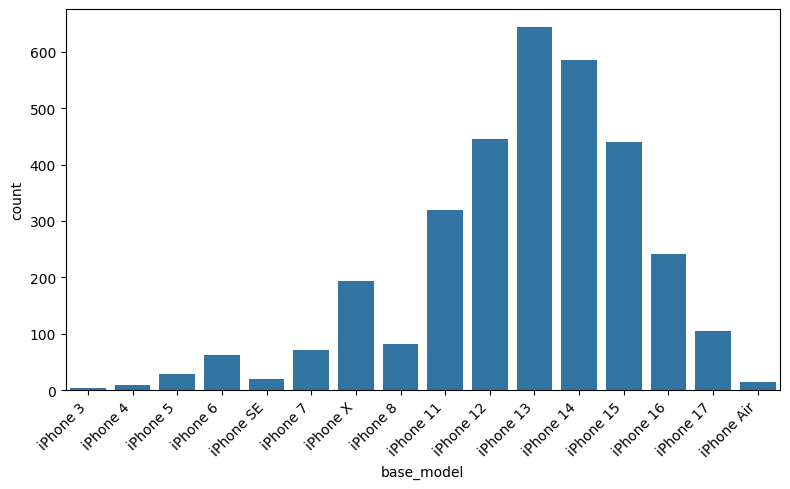

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(8,5))

sns.countplot(data=iphones_no_se, x='base_model', order=iphones_no_se.sort_values('base_release')['base_model'])

ax.set_xticklabels(labels=ax.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

When dismissing SE models that are not very popular in the second hand market, a trend becomes clear. iPhones that were released 3-4 years ago. This could be indicating that iPhone users in Lithuania usually switch phones after 3-4 years.

### Condition

In [126]:
iphones['condition'].value_counts(dropna=False)

condition
Naudota    3035
Nauja       285
NaN           2
Name: count, dtype: int64

There are a total of 2 condition values: used (Naudota) and new (Nauja). 2 rows have missing values.

In [128]:
iphones[iphones['condition'].isna()]

,id,name,maker,model,condition,price,city,views,likes,description,url,stars,sold,sale_time,last_update,registration_date,n_listings,seller_verified,base_model,base_release
3059,82714929.0,Parduodamas idealios bukles iPhone 16pro Max,Apple,iPhone 16 Pro Max,NaN,NaN,Kaunas,122.0,5.0,"telefonas idealios bukles, naudotas 8 menesius...",https://www.skelbiu.lt/skelbimai/parduodamas-i...,NaN,False,NaN,Atnaujintas gruodžio 14 d.,2025-12-01 00:00:00,1.0,True,iPhone 16,2024
3292,81469789.0,"Parduodu iPhone,7.arba Keiciu I Didesni.45,eur.",Apple,iPhone 7,NaN,NaN,Vilnius,59.0,0.0,Bukle naudota 10.viskas veikia baterija gera n...,https://www.skelbiu.lt/skelbimai/parduodu-ipho...,NaN,False,NaN,Atnaujintas rugsėjo 28 d.,2025-07-01 00:00:00,7.0,True,iPhone 7,2016


A look at their descriptions tells us that both of them are used.

In [129]:
iphones.loc[3059, 'condition'] = 'Naudota'
iphones.loc[3292, 'condition'] = 'Naudota'

### City

In [136]:
iphones['city'].value_counts()

city
Vilnius                     1319
Kaunas                       681
Klaipėda                     273
Šiauliai                     232
Panevėžys                     93
                            ... 
Vilnius, Kupiškio r.           1
Plungės r., Klaipėda           1
Rietavas                       1
Druskininkai, Lazdijų r.       1
Pagėgiai                       1
Name: count, Length: 121, dtype: int64

Most common city is Vilnius, the largest city in Lithuania. Other iPhones are purchasable either in smaller towns or multiple locations.

/var/folders/l1/t93y2fns7r99qn6s0phqmdr80000gn/T/ipykernel_67459/3313955404.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels=ax.get_xticklabels(), rotation=45, ha='right')


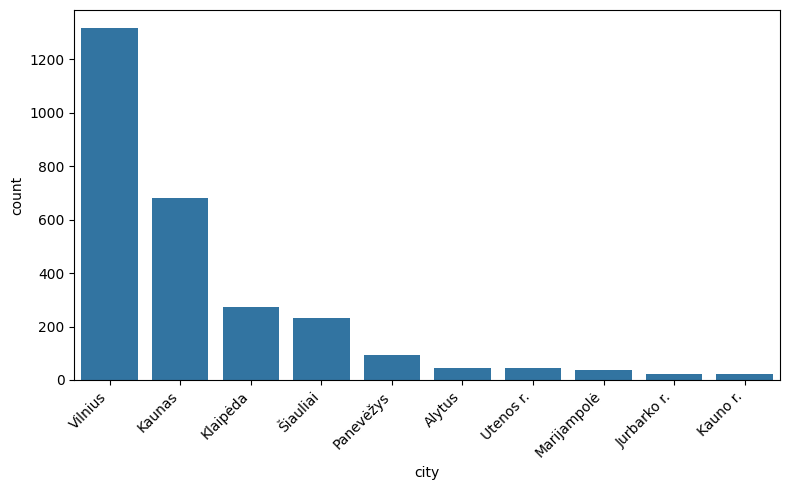

In [140]:
fig, ax = plt.subplots(1,1, figsize=(8,5))

sns.countplot(data=iphones, x='city', order=iphones.city.value_counts().iloc[:10].index)

ax.set_xticklabels(labels=ax.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

### Views & likes

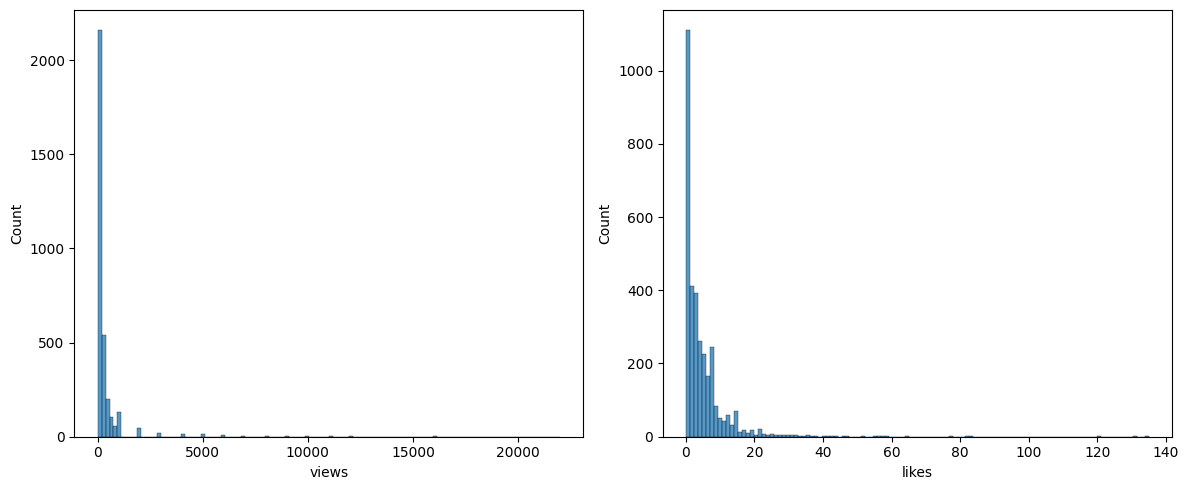

In [142]:
fig, axes = plt.subplots(1,2, figsize=(12,5))

sns.histplot(data=iphones, x='views', ax=axes[0])

sns.histplot(data=iphones, x='likes', ax=axes[1])

plt.tight_layout()
plt.show()

In [146]:
(iphones['views'] < 800).sum() / len(iphones['views'])

np.float64(0.9099939795304034)

In [148]:
(iphones['likes'] < 20).sum() / len(iphones['likes'])

np.float64(0.9674894641782059)

Listings rarely pass 800 views or have more than 20 likes. Since most listings are individual items by private sellers, ads are a one-and-done process.

### Description

In [149]:
iphones.loc[0, 'description']

'iPhone 15 Pro Max 256GB, 89% baterija, puikios būklės\n\nParduodamas iPhone 15 Pro Max 256 GB, puikiai veikiantis, naudotas atsakingai. Telefonas techniškai idealus viskas veikia be priekaištų, Face ID, kameros, garsas, ryšys.\n\nBaterijos būklė – 89% (laiko visą dieną be problemų)\nAtmintis – 256 GB\nJokių remontų, neardytas, originalios detalės\nICloud nuimtas, paruoštas naujam savininkui\n\nBūklė:\nKorpusas idealus, be skilimų ar įbrėžimų.\nYra keli smulkūs ekrano įbrėžimai (netrukdo naudojimui, nepastebimi).\n\n\nFlagmanas su titaniniu korpusu lengvas ir itin tvirtas\nItin gera kamera (puikios nuotraukos ir video)\nGreitas ir sklandus veikimas be jokių lagų\nDidelis ir ryškus ekranas patogu žiūrėti video, dirbti, žaisti\n\nGalimas patikrinimas gyvai, siunčiu ir paštu.\nJei reikia atsiųsiu daugiau nuotraukų ar video.'

As stated before, descriptions and listing names usually have useful information such as storage capacity or battery health. We can extract these feature from text with regexes.

In [189]:
def extract_storage(description):
    if not isinstance(description, str):
        return None

    storage = re.search(r'(\d{1,4})\s*([gGtT][bB])', description)

    if storage:
        return f"{storage.group(1)}{storage.group(2).upper()}"
    return None
    
def extract_battery(description):
    if not isinstance(description, str):
        return None
    
    battery = re.search(r'([1-9]\d{1,2})\s*%', description)
    
    if battery:
        return battery.group(1)
    return None

In [190]:
iphones = iphones.assign(storage_size = (iphones['name'] + ' ' + iphones['description']).apply(extract_storage))

iphones = iphones.assign(battery_health = (iphones['name'] + ' ' + iphones['description']).apply(extract_battery))

In [191]:
iphones['storage_size'].value_counts().head()

storage_size
128GB    1123
256GB     762
64GB      408
512GB     135
32GB       43
Name: count, dtype: int64

In [194]:
iphones['battery_health'].value_counts().head()

battery_health
100    216
86     142
85     136
84     105
89      99
Name: count, dtype: int64

### Promoted listings

In [151]:
iphones['stars'].value_counts(dropna=False)

stars
NaN    3231
1.0      90
2.0       1
Name: count, dtype: int64

It is rare for advertisements to be promoted.

### Sold listings

In [152]:
iphones['sold'].value_counts(dropna=False)

sold
False    3206
True      116
Name: count, dtype: int64

Items that are sold are still shown on the website in order to encourage users to create listings themselves.

In [155]:
iphones[~iphones['sale_time'].isna()]['sale_time'].value_counts()

sale_time
Parduota                45
Parduota per 5 d.        9
Parduota per 3 d.        9
Parduota per 2 d.        7
Parduota per 4 d.        6
Parduota per 8 d.        5
Parduota per 1 d.        5
Parduota per 7 d.        4
Parduota per 9 d.        3
Parduota per 6 d.        3
Parduota per 21 val.     2
Parduota per 1 val.      2
Parduota per 13 val.     2
Parduota per 16 val.     1
Parduota per 3 val.      1
Parduota per 8 val.      1
Parduota per 10 d.       1
Parduota per 2 val.      1
Parduota per 14 val.     1
Parduota per 47 min.     1
Parduota per 2 min.      1
Parduota per 8 min.      1
Parduota per 37 min.     1
Parduota per 50 min.     1
Parduota per 43 min.     1
Parduota per 9 val.      1
Parduota per 4 val.      1
Name: count, dtype: int64

For items that were sold, a time since sale is shown in the advert. There are 2 abnormal of 2 and 8 minute sale times. That is not possible and should be removed. Other values should be standartized into hours.

In [208]:
def standatized_sale_time(input):
    if not isinstance(input, str):
        return None

    time = re.search(r'\d+', input)

    if time:
        time = float(time.group())
    else:
        return None

    if 'd.' in input:
        return time*24
    elif 'val.' in input:
        return time
    else:
        return time/60

In [211]:
iphones['sale_time_hours'] = iphones['sale_time'].apply(standatized_sale_time)

In [213]:
iphones['sale_time_hours'].value_counts().head()

sale_time_hours
72.0     9
120.0    9
48.0     7
96.0     6
24.0     5
Name: count, dtype: int64

### Last update

In [157]:
iphones['last_update'].value_counts()

last_update
Atnaujintas prieš 1 d.         639
Atnaujintas gruodžio 23 d.     207
Atnaujintas prieš 10 val.      164
Atnaujintas gruodžio 22 d.     162
Atnaujintas prieš 3 d.         134
                              ... 
Atnaujintas prieš 37 min.        1
Atnaujintas prieš 25 min.        1
Atnaujintas rugsėjo 13 d.        1
Atnaujintas rugpjūčio 24 d.      1
Atnaujintas rugsėjo 25 d.        1
Name: count, Length: 160, dtype: int64

Skelbiu.lt also has a feature where a seller can update their listings every 24 hours without making any changes to make their listing more visible.

### Seller atributes

Finally, there are 3 attributes in ads that describe the seller: registration date, number of listings and verification status.

In [159]:
iphones['registration_date'].value_counts()

registration_date
2025-12-01 00:00:00    134
2025-11-01 00:00:00     87
2025-10-01 00:00:00     80
2018-01-01 00:00:00     75
2010-07-01 00:00:00     63
                      ... 
2012-09-01 00:00:00      1
2013-10-01 00:00:00      1
2012-01-01 00:00:00      1
2010-11-01 00:00:00      1
2006-12-01 00:00:00      1
Name: count, Length: 221, dtype: int64

Interestingly, most accounts were created in the past month. This could be further investigated by checking the ads for bot activity.

In [161]:
iphones['n_listings'].value_counts()

n_listings
1.0       150
2.0       138
3.0       133
4.0        84
5.0        74
         ... 
2250.0      1
554.0       1
821.0       1
2549.0      1
484.0       1
Name: count, Length: 467, dtype: int64

Most succesfully scraped active sellers have posted 3 or less adverts.

In [163]:
iphones['seller_verified'].value_counts()

seller_verified
True     2351
False     855
Name: count, dtype: int64

Most sellers are verified, meaning they have spent 0.1 euros or less on the platform.

## Deep-dive